### New COde

In [10]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [16]:
import pandas as pd
import nltk
import re

# Download stopwords (only runs if not already downloaded)
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Load your custom resume dataset
df = pd.read_csv("resume_data.csv")

# Check the first few rows
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [18]:
# Combine important fields into one 'resume_text' column
def combine_resume_fields(row):
    fields = [
        str(row.get('career_objective', '')),
        str(row.get('skills', '')),
        str(row.get('educational_institution_name', '')),
        str(row.get('degree_names', '')),
        str(row.get('professional_company_names', '')),
        str(row.get('job_position_name', '')),
        str(row.get('skills_required', '')),
    ]
    return ' '.join(fields)

df['resume_text'] = df.apply(combine_resume_fields, axis=1)

# Clean the combined resume text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', text)  # Remove links and symbols
    text = re.sub(r'\s+', ' ', text)                        # Remove extra whitespace
    text = text.lower()                                     # Lowercase
    words = text.split()                                    # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['cleaned_resume'] = df['resume_text'].apply(clean_text)

# View the cleaned result
df[['resume_text', 'cleaned_resume']].head()



,resume_text,cleaned_resume
0,Big data analytics working and database wareho...,big data analytics working database warehouse ...
1,Fresher looking to join as a data analyst and ...,fresher looking join data analyst junior data ...
2,"nan ['Software Development', 'Machine Learning...",nan software development machine learning deep...
3,To obtain a position in a fast-paced business ...,obtain position fastpaced business office envi...
4,Professional accountant with an outstanding wo...,professional accountant outstanding work ethic...


In [19]:
# -------------------------
# 1. TF-IDF Vectorization
# -------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()

# -------------------------
# 2. Define Target Variable
# -------------------------
y = df['matched_score']

# -------------------------
# 3. Train-Test Split
# -------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 4. Train Regression Model
# -------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate the Model
# -------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0155
R² Score: 0.4382


In [20]:
def predict_score(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned]).toarray()
    score = model.predict(vector)[0]
    return round(score, 3)

# Example usage:
sample_resume = """
Experienced Data Analyst with expertise in Python, Pandas, NumPy, and Scikit-learn.
Worked with large datasets and built ML models.
"""
predicted = predict_score(sample_resume)
print("Predicted Matched Score:", predicted)


Predicted Matched Score: 27829940636.98


In [22]:
print(df.columns.tolist())


['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score', 'resume_text', 'cleaned_resume', 'predicted_score']


In [25]:
# Rename the column with the weird BOM character to a normal one
df.rename(columns={'\ufeffjob_position_name': 'job_position_name'}, inplace=True)


In [26]:
# Create the sorted DataFrame again after renaming
top_resumes = df.sort_values(by='predicted_score', ascending=False)

# Now this will work
print(top_resumes[['job_position_name', 'predicted_score']].head(10))


                                      job_position_name  predicted_score
3678                                        AI Engineer         0.971867
4750                       Database Administrator (DBA)         0.963322
3676                           Senior Software Engineer         0.960392
1041  Intern (Generative AI Engineering - 2D/3D Imag...         0.960392
1331                       Executive/ Sr. Executive -IT         0.960392
2404                     Machine Learning (ML) Engineer         0.960392
3901             Full Stack Developer (Python,React js)         0.960392
1712  System Administrator (Operation & Maintenance ...         0.957097
4536             Asst. Manager/ Manger (Administrative)         0.950383
6673                                        AI Engineer         0.948918


In [27]:
# Filter resumes for a specific job role
target_role = "AI Engineer"

filtered_resumes = top_resumes[top_resumes['job_position_name'].str.contains(target_role, case=False)]

# Show top 10 for that role
print(filtered_resumes[['job_position_name', 'predicted_score']].head(10))


                                      job_position_name  predicted_score
3678                                        AI Engineer         0.971867
1041  Intern (Generative AI Engineering - 2D/3D Imag...         0.960392
6673                                        AI Engineer         0.948918
3536  Intern (Generative AI Engineering - 2D/3D Imag...         0.939152
496                                         AI Engineer         0.935612
3857                                        AI Engineer         0.922062
5                                           AI Engineer         0.921452
2205  Intern (Generative AI Engineering - 2D/3D Imag...         0.918980
5039                                        AI Engineer         0.913517
550   Intern (Generative AI Engineering - 2D/3D Imag...         0.912663


In [28]:
# Save top 20 resumes for selected role
filtered_resumes.head(20).to_csv('top_candidates_for_AI_Engineer.csv', index=False)


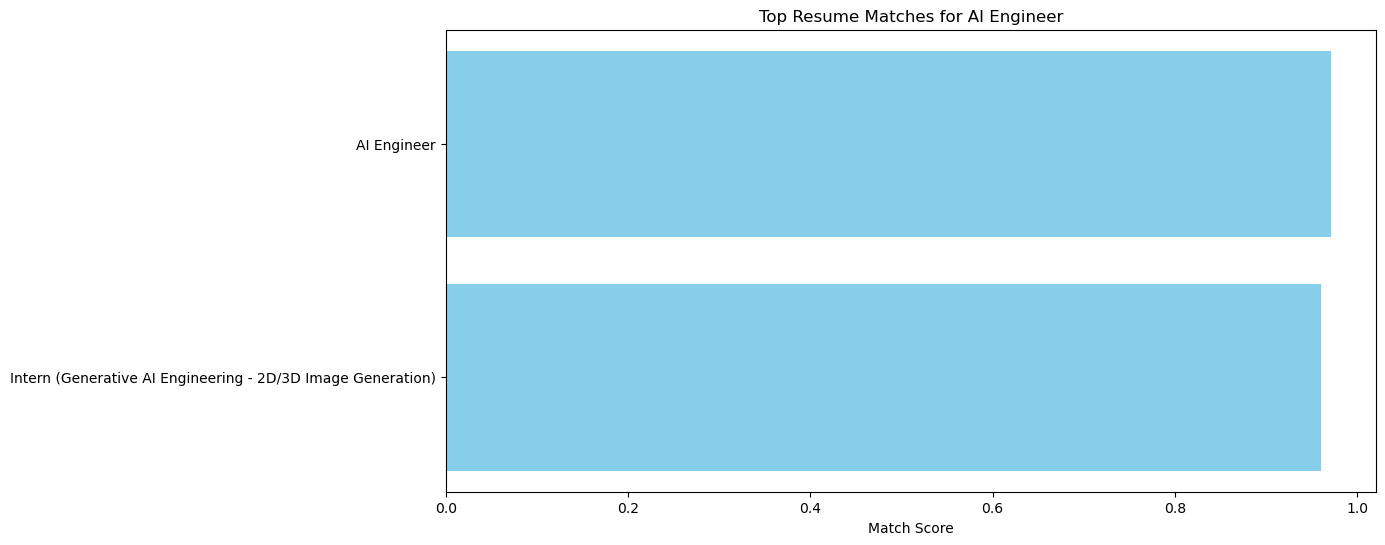

In [29]:
import matplotlib.pyplot as plt

top_10 = filtered_resumes.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10['job_position_name'], top_10['predicted_score'], color='skyblue')
plt.xlabel('Match Score')
plt.title(f'Top Resume Matches for {target_role}')
plt.gca().invert_yaxis()  # Highest on top
plt.show()


In [30]:
# Display the resume text of the top match
print("Top Candidate's Resume Text:\n")
print(filtered_resumes.iloc[0]['resume_text'])


Top Candidate's Resume Text:

I seek to join a dynamic firm where my attention to detail and creative professional services can be valuable. ['Microsoft Office Suite', 'Dynamic AX', 'Access', 'Excel', 'PowerPoint', 'Word', 'Microsoft Teams', 'Oracle', 'PeopleSoft', 'Sales Force', 'SAP', 'Jira', 'SharePoint', 'Gantt Chart Scheduler', 'strong written and verbal communication skills', 'project management lifecycle', 'Streamline', 'ad', 'advertisements', 'advertising', 'ad copy', 'agile', 'automation', 'billing', 'budgets', 'cable', 'hardware', 'client', 'clients', 'database', 'engineering projects', 'financial', 'focus', 'inventory', 'leadership', 'managing', 'market trends', 'processes', 'project management', 'proposals', 'real time', 'reporting', 'Sales', 'scheduling', 'verbal communication skills', 'workbench', 'written communication skills'] ['Oakland University'] ['Bachelor of Arts'] ['Company Name', 'Company Name', 'Company Name']  Python
R or Java
TensorFlow
PyTorch
Scikit-learn.


### Add a User Input Function (for Flexibility)

In [ ]:
# Dynamic role input
user_input = input("Enter the job role to filter resumes: ")
filtered = top_resumes[top_resumes['job_position_name'].str.contains(user_input, case=False)]
print(filtered[['job_position_name', 'predicted_score']].head(10))
